# Titanic Train Data Set Exploratory Analysis
## Carlos Hinrichsen
### June 27$^{th}$, 2019

We will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster?
* The detailed explanation of the logic of the analysis

**Question 2.**
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.

__ALL THE QUESTIONS ARE ANSWERED IN THE SECTIONS 3 TO 7 OF THIS DOCUMENT__

__Below you will find a series of neccesary steps in order to respond the questions addressed above:__

## 1. Import Required Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random
import pandas as pd
plt.style.use('ggplot')

## 2. Upload the `train.csv` data to explore

In [2]:
# Importing the original data
odata = pd.read_csv('train.csv',header=0)

## 3. Exploring the raw data set

The names of the different variables is shown below.

In [3]:
# Extract column names
odata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Now, we will review the general characteristics of the dataset, and then review the data.

In [4]:
# Extract information of dataset
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Looking for the general description of the data

In [5]:
# Extract description
odata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can only see the numerical variables. The most important statistic that we can see is that only __$38.38$%__ of the people survived the disaster.

Now reviewing all the data

In [6]:
# Showing the data
odata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Observations

1. __Passenger ID:__ This variables is useless, basically because it os just an indicator of the observation number (row)
2. __Survived:__ It's saved as integer and we are going to transform it into a categorical variable
3. __Pclass:__ Same as above variable
4. __Name:__ Could be interesting to transform this variable into a categorical with some categories such as Miss., Mr., etc.
5. __Sex:__ We will change this type into categories
6. __Age:__ We can see that there are many NaN values in this column (we only have 714 observations out of 889). The approach to fill the rest of the NaN values is using a relations between the Age variable using other variables
7. __SibSp:__ No observations
8. __Parch:__ No observations
9. __Ticket:__ The ticket numeration it almost all cases has the same information as class, so we will eliminate this variables
10. __Fare:__ We will transform and scale this data. The idea is to understand if there is a relation if you under or overpaid the ticket considering the mean. We will create categories
11. __Cabin:__ There are only $\frac{204}{889}\approx{23}\%$ observations. In this case we will eliminate the entire column
12. __Embarked:__ There are only two missing variables, that represents $\approx{0.2}\%$. Therefore, we will eliminate also these 2 observations 



## 4. Data Cleaning

As explained above, we will first drop the irrelevant variables: Passaenger ID, Ticket, Cabin, and the two NaN observations within Embarked variables:

In [7]:
# Dropping the columns
odata = odata.drop(['PassengerId','Ticket','Cabin'], axis=1)
# Dropping the Embarked observations
odata = odata[pd.notnull(odata['Embarked'])]
odata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


## 5. Data Transformation

As explained above, we will do the following:

#### 5.1. Change "Survived", "Pclass", "Sex" and "Embarked" variables into categorical type. 

In order to check that the transformation is working, we will cretae two other variables, "Survived_C" and "Pclass_C". Once we check that the trasnformation is right, we will drop the original variables 

In [8]:
odata['Survived_C'] = odata['Survived'].apply(lambda x: 'Not Survived' if x == 0 else 'Survived')
odata['Pclass_C'] = odata['Pclass'].apply(lambda x: 'First' if x == 1 else ('Second' if x==2 else "Third"))
odata['Survived_C'] = pd.Categorical(odata.Survived_C,categories=["Not Survived","Survived"])
odata['Pclass_C'] = pd.Categorical(odata.Pclass_C,categories=["First","Second","Third"])
odata['Embarked'] = pd.Categorical(odata.Embarked)
odata['Sex'] = pd.Categorical(odata.Sex)
odata.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_C,Pclass_C
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Not Survived,Third
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,First
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Third
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,First
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Not Survived,Third
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Not Survived,Third
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Not Survived,First
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Not Survived,Third
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Survived,Third
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Survived,Second


The transformation is working properly, therefore we will drop the variables "Survived" and "Pclass" 

In [9]:
# Dropping the variables
odata = odata.drop(['Survived','Pclass'], axis=1)
odata.head()

,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_C,Pclass_C
0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Not Survived,Third
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,First
2,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Third
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,First
4,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Not Survived,Third


#### 5.2. Create a variables with the title names of every passanger (such as Mr., Miss., etc.)

We will create a categorical variable named "Name_Title", and then drop the original variable. The idea how to extract the substring of the name was based on the following thread: https://stackoverflow.com/questions/29294017/extract-substring-from-string-in-dataframe  

In [10]:
# Extracting the title
odata['Name_Title'] = odata['Name'].str.extract("\,(.*)\.")
# Tranform into categorical
odata['Name_Title'] = pd.Categorical(odata.Name_Title)
odata.head()

,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_C,Pclass_C,Name_Title
0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Not Survived,Third,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,First,Mrs
2,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Third,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,First,Mrs
4,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Not Survived,Third,Mr


It's working, therefore we drop the "Name" variable

In [11]:
# Dropping the variable
odata = odata.drop(['Name'], axis=1)
odata.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_C,Pclass_C,Name_Title
0,male,22.0,1,0,7.2500,S,Not Survived,Third,Mr
1,female,38.0,1,0,71.2833,C,Survived,First,Mrs
2,female,26.0,0,0,7.9250,S,Survived,Third,Miss
3,female,35.0,1,0,53.1000,S,Survived,First,Mrs
4,male,35.0,0,0,8.0500,S,Not Survived,Third,Mr


#### 5.3. Tranform "Fare" variable into a "Fare_P" variables (Standardization)

First we calculate the Fare mean

In [12]:
# Calculating the mean of the Fare variable
fm = odata["Fare"].mean()
fm

32.09668087739029

In [13]:
# Calculating the standard deviation of the Fare variable
fsd = odata["Fare"].std()
fsd

49.69750431670801

Now let's calculate the new variable "Fare_P". Basically, this new variable is:

$$
\Bigg(\frac{{Fare_{i}}-{E(Fare)}}\sigma\Bigg)
$$


In [14]:
odata['Fare_P'] = odata['Fare'].apply(lambda x: (x-fm)/fsd)
odata.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_C,Pclass_C,Name_Title,Fare_P
0,male,22.0,1,0,7.2500,S,Not Survived,Third,Mr,-0.499958
1,female,38.0,1,0,71.2833,C,Survived,First,Mrs,0.788503
2,female,26.0,0,0,7.9250,S,Survived,Third,Miss,-0.486376
3,female,35.0,1,0,53.1000,S,Survived,First,Mrs,0.422623
4,male,35.0,0,0,8.0500,S,Not Survived,Third,Mr,-0.483861


Now let's create 10 categories for this Fare_P

In [15]:
cat=10
fare_cat=pd.cut(odata.Fare_P,cat)
odata['Fare_C'] = fare_cat
odata['Fare_C'] = pd.Categorical(odata.Fare_C)
odata.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_C,Pclass_C,Name_Title,Fare_P,Fare_C
0,male,22.0,1,0,7.2500,S,Not Survived,Third,Mr,-0.499958,"(-0.656, 0.385]"
1,female,38.0,1,0,71.2833,C,Survived,First,Mrs,0.788503,"(0.385, 1.416]"
2,female,26.0,0,0,7.9250,S,Survived,Third,Miss,-0.486376,"(-0.656, 0.385]"
3,female,35.0,1,0,53.1000,S,Survived,First,Mrs,0.422623,"(0.385, 1.416]"
4,male,35.0,0,0,8.0500,S,Not Survived,Third,Mr,-0.483861,"(-0.656, 0.385]"


Now we can drop the "Fare" and "Fare_P variables

In [16]:
odata = odata.drop(['Fare','Fare_P'], axis=1)
odata.head()

,Sex,Age,SibSp,Parch,Embarked,Survived_C,Pclass_C,Name_Title,Fare_C
0,male,22.0,1,0,S,Not Survived,Third,Mr,"(-0.656, 0.385]"
1,female,38.0,1,0,C,Survived,First,Mrs,"(0.385, 1.416]"
2,female,26.0,0,0,S,Survived,Third,Miss,"(-0.656, 0.385]"
3,female,35.0,1,0,S,Survived,First,Mrs,"(0.385, 1.416]"
4,male,35.0,0,0,S,Not Survived,Third,Mr,"(-0.656, 0.385]"


Finally we can reorder the columns

In [17]:
odata = odata[['Survived_C','Pclass_C','Name_Title','Sex','Age','SibSp','Parch','Fare_C','Embarked']]
odata.head()

,Survived_C,Pclass_C,Name_Title,Sex,Age,SibSp,Parch,Fare_C,Embarked
0,Not Survived,Third,Mr,male,22.0,1,0,"(-0.656, 0.385]",S
1,Survived,First,Mrs,female,38.0,1,0,"(0.385, 1.416]",C
2,Survived,Third,Miss,female,26.0,0,0,"(-0.656, 0.385]",S
3,Survived,First,Mrs,female,35.0,1,0,"(0.385, 1.416]",S
4,Not Survived,Third,Mr,male,35.0,0,0,"(-0.656, 0.385]",S


## 6. Fill NaN Age values using relations between Age and rest of variables

To do this, first we need to review the dataset without the NaN, and understand the relationship between Age and the other variables.

The idea is to understand in what variables the Age differs, looking for important differences. Two variables related with Age will be enough.


In [18]:
# First we subset the data only considering Age variables without NaN
odata_s = odata.copy()
odata_s = odata_s[pd.notnull(odata['Age'])]
odata_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Survived_C    712 non-null category
Pclass_C      712 non-null category
Name_Title    712 non-null category
Sex           712 non-null category
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare_C        712 non-null category
Embarked      712 non-null category
dtypes: category(6), float64(1), int64(2)
memory usage: 27.7 KB


Now we will do an analysis of Age and the different variables in this `odata_s` dataset 

##### 6.1 Relation between variables and Age


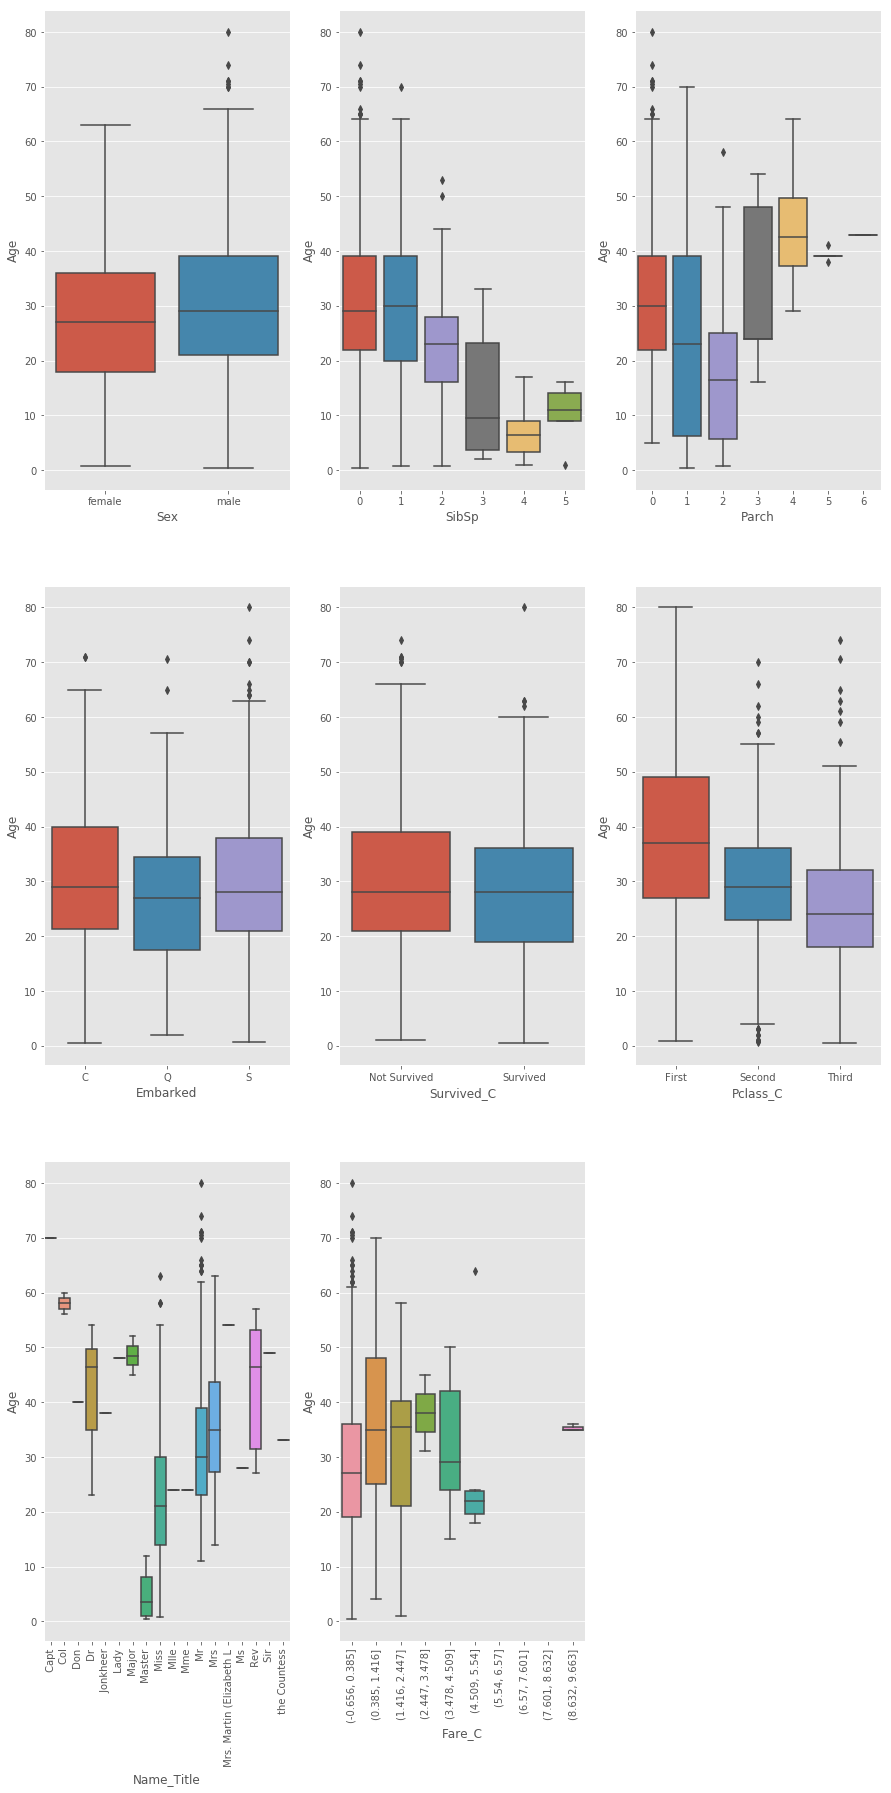

In [19]:
plt.rc('figure', figsize=(15, 30))
plt.subplot(3,3,1)
sns.boxplot(x=odata_s.Sex, y=odata_s.Age)
plt.subplot(3,3,2)
sns.boxplot(x=odata_s.SibSp, y=odata_s.Age)
plt.subplot(3,3,3)
sns.boxplot(x=odata_s.Parch, y=odata_s.Age)
plt.subplot(3,3,4)
sns.boxplot(x=odata_s.Embarked, y=odata_s.Age)
plt.subplot(3,3,5)
sns.boxplot(x=odata_s.Survived_C, y=odata_s.Age)
plt.subplot(3,3,6)
sns.boxplot(x=odata_s.Pclass_C, y=odata_s.Age)
plt.subplot(3,3,7)
g1 = sns.boxplot(x=odata_s.Name_Title, y=odata_s.Age)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1
plt.subplot(3,3,8)
g2 = sns.boxplot(x=odata_s.Fare_C, y=odata_s.Age)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2

Looking the plots, the two variables where we can see the bigger differences between categories to explain Age are:

1. Name_Title
2. Fare_C

There are others with relations with these 2, such as "Pclass_C" which is somewhat related to the "Fare_C".

Let's calculate the mean Age for the missing values.

##### 6.2 Computing the mean


In [20]:
# Copying the data for plotting purposes
odata2 = odata.copy()
# Filling the misssing values
odata['Age'] = odata.groupby(['Name_Title','Fare_C'])['Age'].transform(lambda x: x.fillna(x.mean()))
odata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived_C    889 non-null category
Pclass_C      889 non-null category
Name_Title    889 non-null category
Sex           889 non-null category
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare_C        889 non-null category
Embarked      889 non-null category
dtypes: category(6), float64(1), int64(2)
memory usage: 34.3 KB


We can see that all Ages were filled. Additionally, let's plot the histogram before and after the transformation.

C:\Users\Carlos Hinrichsen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Carlos Hinrichsen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


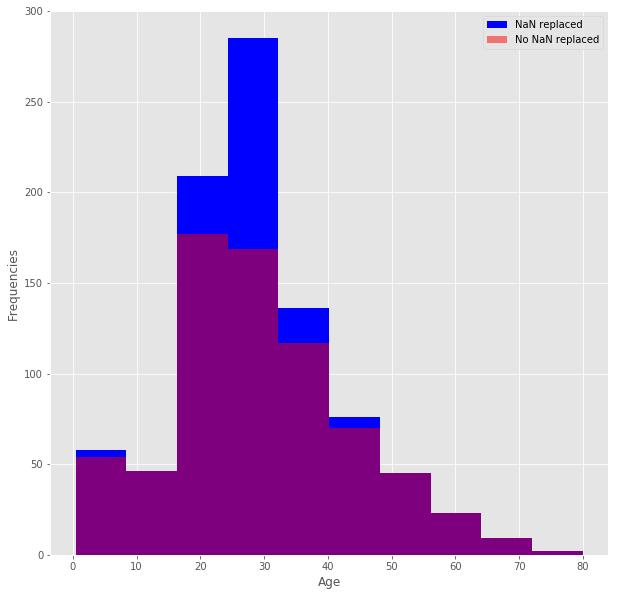

In [21]:
plt.rc('figure', figsize=(10, 10))
plt.ylim(0,300)
plt.hist(odata.Age,facecolor='b', alpha=1,label='NaN replaced')
plt.hist(odata2.Age,facecolor='red', alpha=0.5,label='No NaN replaced')
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.legend()

##### 6.3 Creating categories of the Age according to Statistics Canada

We will create categories for the Age according to statistics Canada: https://www.statcan.gc.ca/eng/concepts/definitions/age2

The idea is no be able to analize better the relation between the variables. The categories are:

1. __Children:__ 0-14 years
2. __Youth:__ 15-24 years
3. __Aduls:__ 25-64 years
4. __Senior:__ Over 65 years

In [22]:
# Creating the categories
age_cat = pd.cut(odata.Age, [0, 14, 24, 64,100], include_lowest=False)
odata['Age_C'] = age_cat
odata['Age_C'] = pd.Categorical(odata.Age_C)
odata.head()

,Survived_C,Pclass_C,Name_Title,Sex,Age,SibSp,Parch,Fare_C,Embarked,Age_C
0,Not Survived,Third,Mr,male,22.0,1,0,"(-0.656, 0.385]",S,"(14, 24]"
1,Survived,First,Mrs,female,38.0,1,0,"(0.385, 1.416]",C,"(24, 64]"
2,Survived,Third,Miss,female,26.0,0,0,"(-0.656, 0.385]",S,"(24, 64]"
3,Survived,First,Mrs,female,35.0,1,0,"(0.385, 1.416]",S,"(24, 64]"
4,Not Survived,Third,Mr,male,35.0,0,0,"(-0.656, 0.385]",S,"(24, 64]"


Now let's drop the "Age" variable

In [23]:
odata = odata.drop(['Age'], axis=1)
odata.head()

,Survived_C,Pclass_C,Name_Title,Sex,SibSp,Parch,Fare_C,Embarked,Age_C
0,Not Survived,Third,Mr,male,1,0,"(-0.656, 0.385]",S,"(14, 24]"
1,Survived,First,Mrs,female,1,0,"(0.385, 1.416]",C,"(24, 64]"
2,Survived,Third,Miss,female,0,0,"(-0.656, 0.385]",S,"(24, 64]"
3,Survived,First,Mrs,female,1,0,"(0.385, 1.416]",S,"(24, 64]"
4,Not Survived,Third,Mr,male,0,0,"(-0.656, 0.385]",S,"(24, 64]"


## 7. Analysis and Questions Answered

Now we finally have the final dataset to respond all the questions:

**Question 1.**
* __The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster?__
* __The detailed explanation of the logic of the analysis__


First we will analyze the relation between the Survival and each variable (one at a time). Then we will increse the number of variables in order to have more insights.

Considering the second part of the question, the logic is explained between each grouped table below, and in the sections 4, 5 and 6.

#### One on one variables analysis

1. __Relation between Survival and Class__

In [24]:
odata.groupby(['Survived_C','Pclass_C']).size()

Survived_C    Pclass_C
Not Survived  First        80
              Second       97
              Third       372
Survived      First       134
              Second       87
              Third       119
dtype: int64

Therefore, the first class was the most likely to survive, and the class with less survival person was the third. Computing as probabilities:

In [25]:
odata.groupby(['Survived_C','Pclass_C']).size()/len(odata.Survived_C)*100

Survived_C    Pclass_C
Not Survived  First        8.998875
              Second      10.911136
              Third       41.844769
Survived      First       15.073116
              Second       9.786277
              Third       13.385827
dtype: float64

We get the same conclusion, and it's important to highlight that almost 40% of the people that didn't survive were third class people.

2. __Relation between Survival and Age__

In [26]:
odata.groupby(['Survived_C','Age_C']).size()

Survived_C    Age_C    
Not Survived  (0, 14]       34
              (14, 24]     138
              (24, 64]     367
              (64, 100]     10
Survived      (0, 14]       47
              (14, 24]      94
              (24, 64]     198
              (64, 100]      1
dtype: int64

In this case, most of the people who survived and didn't survive are the ones between 24 and 64 years (adults). Additionally, the number of youth people (14-24 years) that didn't survive is important. The probabilities are below.

In [27]:
odata.groupby(['Survived_C','Age_C']).size()/len(odata.Survived_C)*100

Survived_C    Age_C    
Not Survived  (0, 14]       3.824522
              (14, 24]     15.523060
              (24, 64]     41.282340
              (64, 100]     1.124859
Survived      (0, 14]       5.286839
              (14, 24]     10.573678
              (24, 64]     22.272216
              (64, 100]     0.112486
dtype: float64

3. __Relation between Survival and Name Title__

In [28]:
odata.groupby(['Survived_C','Name_Title']).size()

Survived_C    Name_Title               
Not Survived   Capt                          1
               Col                           1
               Don                           1
               Dr                            4
               Jonkheer                      1
               Major                         1
               Master                       17
               Miss                         55
               Mr                          436
               Mrs                          26
               Rev                           6
Survived       Col                           1
               Dr                            3
               Lady                          1
               Major                         1
               Master                       23
               Miss                        126
               Mlle                          2
               Mme                           1
               Mr                           81
               Mrs  

We can see that women and people with nobel title were more likely to survive. Also men labelled as "Mr." were more likely to not survive (almost 50%). We can see that in the probability table below:

In [29]:
odata.groupby(['Survived_C','Name_Title']).size()/len(odata.Survived_C)*100

Survived_C    Name_Title               
Not Survived   Capt                         0.112486
               Col                          0.112486
               Don                          0.112486
               Dr                           0.449944
               Jonkheer                     0.112486
               Major                        0.112486
               Master                       1.912261
               Miss                         6.186727
               Mr                          49.043870
               Mrs                          2.924634
               Rev                          0.674916
Survived       Col                          0.112486
               Dr                           0.337458
               Lady                         0.112486
               Major                        0.112486
               Master                       2.587177
               Miss                        14.173228
               Mlle                         0.224972
      

4. __Relation between Survival and Fare__

In [30]:
odata.groupby(['Survived_C','Fare_C']).size()

Survived_C    Fare_C         
Not Survived  (-0.656, 0.385]    499
              (0.385, 1.416]      36
              (1.416, 2.447]       8
              (3.478, 4.509]       4
              (4.509, 5.54]        2
Survived      (-0.656, 0.385]    233
              (0.385, 1.416]      68
              (1.416, 2.447]      23
              (2.447, 3.478]       2
              (3.478, 4.509]       7
              (4.509, 5.54]        4
              (8.632, 9.663]       3
dtype: int64

Most of the death people were the ones with the less expensive tickets.

In line with the analysis above, most of the men didn't survive. And most of the female survived. Let's compute the probabilities

In [31]:
odata.groupby(['Survived_C','Fare_C']).size()/len(odata.Survived_C)*100

Survived_C    Fare_C         
Not Survived  (-0.656, 0.385]    56.130484
              (0.385, 1.416]      4.049494
              (1.416, 2.447]      0.899888
              (3.478, 4.509]      0.449944
              (4.509, 5.54]       0.224972
Survived      (-0.656, 0.385]    26.209224
              (0.385, 1.416]      7.649044
              (1.416, 2.447]      2.587177
              (2.447, 3.478]      0.224972
              (3.478, 4.509]      0.787402
              (4.509, 5.54]       0.449944
              (8.632, 9.663]      0.337458
dtype: float64

5. __Relation between Survival and Sex__

In [32]:
odata.groupby(['Survived_C','Sex']).size()

Survived_C    Sex   
Not Survived  female     81
              male      468
Survived      female    231
              male      109
dtype: int64

In line with previous analysis, female were the most likely to survive, and the opposite happened with male. 

6. __Relation between Survival and Embarked__

In [33]:
odata.groupby(['Survived_C','Embarked']).size()

Survived_C    Embarked
Not Survived  C            75
              Q            47
              S           427
Survived      C            93
              Q            30
              S           217
dtype: int64

Most of the people (survived and not survived) were the ones embarked at port S. According with the Pclass_C analysis, there are significant amount of third class people that survived. That could mean that the port S were for the third class, because was the class with less survival but with better survival than second class. Here we can understand that the port is somewhat related to the class.

7. __Relation between Survival and Number of Siblings/Spouses (SibSp)__

In [34]:
odata.groupby(['Survived_C','SibSp']).size()

Survived_C    SibSp
Not Survived  0        398
              1         97
              2         15
              3         12
              4         15
              5          5
              8          7
Survived      0        208
              1        112
              2         13
              3          4
              4          3
dtype: int64

It's interesting to notice that most of the people single and without siblings were the ones that survived and not survived the most. Additionally, people with more quantity of relatives were not likely to survive.

8. __Relation between Survival and Number of Parents/Children (Parch)__

In [35]:
odata.groupby(['Survived_C','Parch']).size()

Survived_C    Parch
Not Survived  0        445
              1         53
              2         40
              3          2
              4          4
              5          4
              6          1
Survived      0        231
              1         65
              2         40
              3          3
              5          1
dtype: int64

Basically the same conclusion as previous analysis

#### More than two variables analysis

1. __Relation between Survival, Sex and Age__

In [36]:
odata.groupby(['Survived_C','Sex','Age_C']).size()/len(odata.Survived_C)*100

Survived_C    Sex     Age_C    
Not Survived  female  (0, 14]       1.574803
                      (14, 24]      3.262092
                      (24, 64]      4.274466
              male    (0, 14]       2.249719
                      (14, 24]     12.260967
                      (24, 64]     37.007874
                      (64, 100]     1.124859
Survived      female  (0, 14]       2.699663
                      (14, 24]      9.223847
                      (24, 64]     14.060742
              male    (0, 14]       2.587177
                      (14, 24]      1.349831
                      (24, 64]      8.211474
                      (64, 100]     0.112486
dtype: float64

With this analysis of the percentages, we can see that most of the people that didn't survive were men over 14 years. On the other hand, the people most likely to survive were women and children.

2. __Relation between Survival, Embarked and Class__

In [37]:
odata.groupby(['Survived_C','Embarked','Pclass_C']).size()/len(odata.Survived_C)*100

Survived_C    Embarked  Pclass_C
Not Survived  C         First        2.924634
                        Second       0.899888
                        Third        4.611924
              Q         First        0.112486
                        Second       0.112486
                        Third        5.061867
              S         First        5.961755
                        Second       9.898763
                        Third       32.170979
Survived      C         First        6.636670
                        Second       1.012373
                        Third        2.812148
              Q         First        0.112486
                        Second       0.224972
                        Third        3.037120
              S         First        8.323960
                        Second       8.548931
                        Third        7.536558
dtype: float64

With this analysis we can understand the the people thaht didn't surive and entered by port S were most of them of third class. On the other thand, people that survived that entered by that door were split almost even between classes. 

3. __Relation between Survival, Name Title and Class__

In [38]:
odata.groupby(['Survived_C','Pclass_C','Name_Title']).size()/len(odata.Survived_C)*100

Survived_C    Pclass_C  Name_Title               
Not Survived  First      Capt                         0.112486
                         Col                          0.112486
                         Don                          0.112486
                         Dr                           0.224972
                         Jonkheer                     0.112486
                         Major                        0.112486
                         Miss                         0.224972
                         Mr                           7.874016
                         Mrs                          0.112486
              Second     Dr                           0.224972
                         Miss                         0.224972
                         Mr                           9.336333
                         Mrs                          0.449944
                         Rev                          0.674916
              Third      Master                       1.912261
     

Here we can see that most of the Mr. that didn't surive (30%) were for the third class.

4. __Relation between Survival, Fare and Class__

In [39]:
odata.groupby(['Survived_C','Pclass_C','Fare_C']).size()/len(odata.Survived_C)*100

Survived_C    Pclass_C  Fare_C         
Not Survived  First     (-0.656, 0.385]     4.949381
                        (0.385, 1.416]      2.474691
                        (1.416, 2.447]      0.899888
                        (3.478, 4.509]      0.449944
                        (4.509, 5.54]       0.224972
              Second    (-0.656, 0.385]    10.348706
                        (0.385, 1.416]      0.562430
              Third     (-0.656, 0.385]    40.832396
                        (0.385, 1.416]      1.012373
Survived      First     (-0.656, 0.385]     3.824522
                        (0.385, 1.416]      6.861642
                        (1.416, 2.447]      2.587177
                        (2.447, 3.478]      0.224972
                        (3.478, 4.509]      0.787402
                        (4.509, 5.54]       0.449944
                        (8.632, 9.663]      0.337458
              Second    (-0.656, 0.385]     9.561305
                        (0.385, 1.416]      0.224972
      

Most of the people with the less expensive tickets per class didn't survive. It's difficult to see the same relation in the people that survived, therefore it's suggested to perform more granular fare classes to asses this.

5. __Relation between Survival, SibSp and Parch__

In [40]:
odata.groupby(['Survived_C','SibSp','Parch']).size()/len(odata.Survived_C)*100

Survived_C    SibSp  Parch
Not Survived  0      0        42.069741
                     1         1.462317
                     2         0.899888
                     4         0.112486
                     5         0.224972
              1      0         6.636670
                     1         2.587177
                     2         0.787402
                     3         0.224972
                     4         0.337458
                     5         0.224972
                     6         0.112486
              2      0         1.349831
                     1         0.112486
                     2         0.224972
              3      1         0.787402
                     2         0.562430
              4      1         1.012373
                     2         0.674916
              5      2         0.562430
              8      2         0.787402
Survived      0      0        18.110236
                     1         2.812148
                     2         2.362205
             

Single people with 1 sibling in the boat were the more likely to survive. On the other hand, the same categories explained the people that didin't survive the most. Therefore, it could be other variables that help explain this behavior.

**Question 2.**
* __What other attributes did you use for the analysis? Explain how you used them and why you decided to use them.__
* __Provide a complete list of all attributes used.__


Most of the attributes were transformed to categorical in order to help with the analysis. An exaplained analysis is shown in the sections 4, 5 and 6. The attributes that I used for the analysis were:

1. __Survived:__ As a categorical variable
2. __Pclass:__ As a categorical variable
3. __Name:__ Was used to extract information of the titles of the people, and therefore other variable were created.
4. __Sex:__ As categorical variable	
5. __SibSp:__ As a categorical variable
6. __Parch:__ As a categorical variable
7. __Fare:__ The fares were standardized, and then categories were created to help the analysis. Therefore other variable were created.
8. __Embarked:__ As a categorical variable
9. __Age:__ The NaN values were filled, and the categories were defined according to Statistics Canada. The idea were to help to understand the analysis by categories. Therefore other variable were created.

According to the analysis explained in the section 4 to 6, these variables were used because they were easy to relate in some ways with the survival variable. 

**Question 3.**
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.


In the sections 3 to 6 is explained how were created the new attributes, and the rationalization about why to create and use them.

The excluded variables also were explained in those sections, with all the rationalization.

**Question 4.**
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In the section 6 is performed all the analysis related to the Age variable and how we treated in the assignment. 